# This notebook is prepared by ApplAi's Technical And Training Depratment. 
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


### 

### Task 1: Importing libraries and Exploring the Dataset.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

### 

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- Age: Age of the patient

- Sex: Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp: Chest Pain type chest pain type
  Value 1: typical angina
  Value 2: atypical angina
  Value 3: non-anginal pain
  Value 4: asymptomatic

- trtbps: resting blood pressure (in mm Hg)

- chol: cholestoral in mg/dl fetched via BMI sensor

- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg: resting electrocardiographic results
  Value 0: normal
  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved

- target: 0= less chance of heart attack 1= more chance of heart attack

In [4]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Check the unique values in each coloumn
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trestbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalach -- 91
exang -- 2
oldpeak -- 40
slope -- 3
ca -- 5
thal -- 4
target -- 2


In [7]:
#Dividing the columns to Categorical and numeric columns 
categorical_list = ["sex", "cp","fbs","restecg","exang","slope","ca","thal","target"]
numeric_list = ["age", "trestbps","chol","thalach","oldpeak","target"]

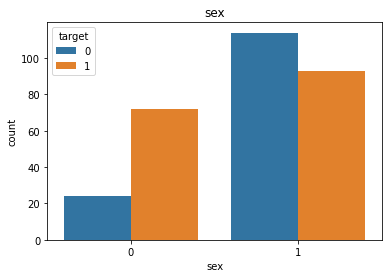

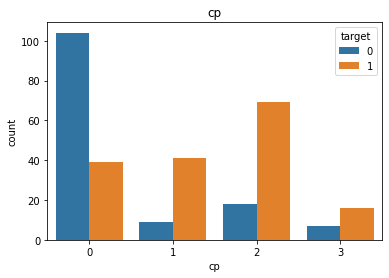

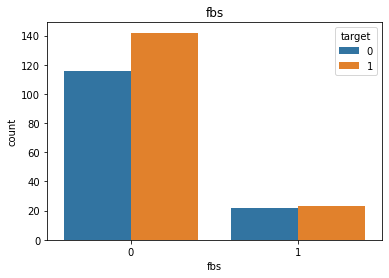

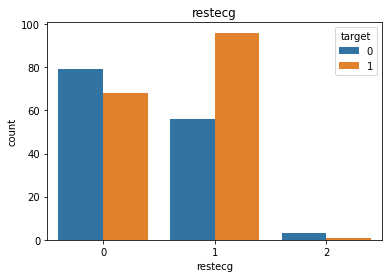

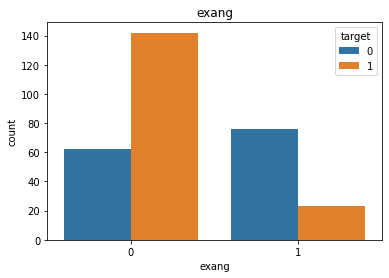

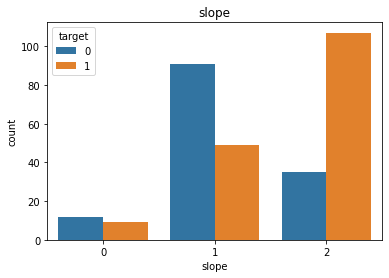

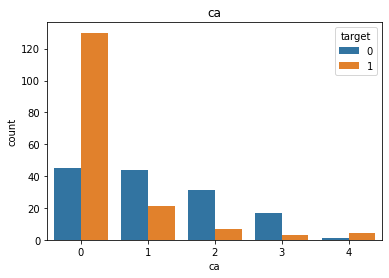

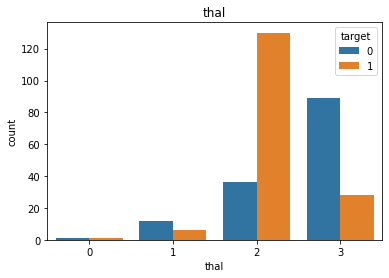

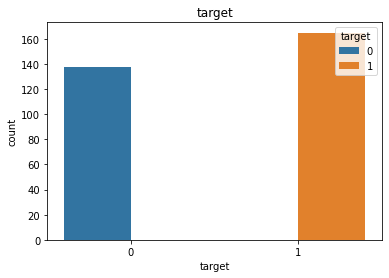

In [8]:
# Checking the distribution of the target among the categorical columns
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "target")
    plt.title(i)

### 

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- as shown there is no null values

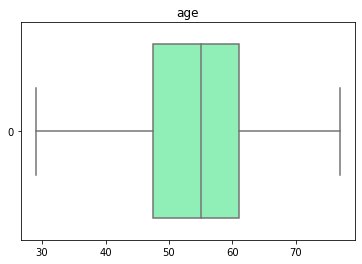

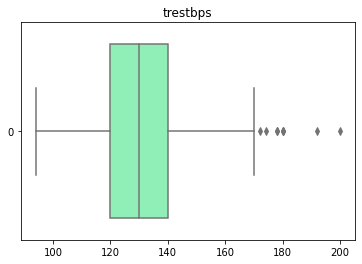

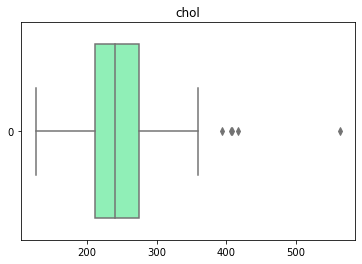

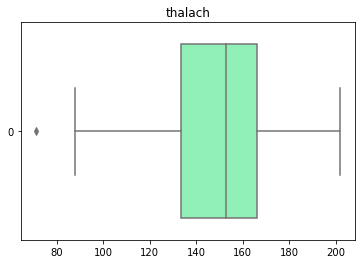

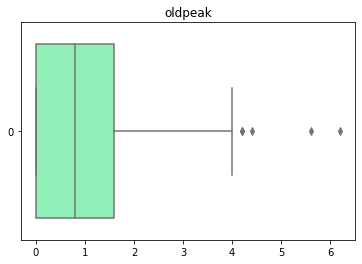

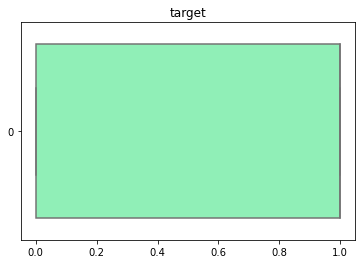

In [10]:
df_numeric = df.loc[:, numeric_list]
for i in numeric_list:
    plt.figure()
    sns.boxplot(data=df[i],palette='rainbow',orient='h')
    plt.title(i)

- there is some outliers

In [11]:
#Removing outlier
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([110, 203, 223, 248, 266], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (298, 14)
Old shape:  (298,)
(array([ 28,  85, 218, 243], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (294, 14)
Old shape:  (294,)
(array([], dtype=int64),) -- (array([263], dtype=int64),)
New shape:  (293, 14)
Old shape:  (293,)
(array([200, 216], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (291, 14)
Old shape:  (291,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (291, 14)


In [12]:
#checking the data info after removing outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       291 non-null    int64  
 1   sex       291 non-null    int64  
 2   cp        291 non-null    int64  
 3   trestbps  291 non-null    int64  
 4   chol      291 non-null    int64  
 5   fbs       291 non-null    int64  
 6   restecg   291 non-null    int64  
 7   thalach   291 non-null    int64  
 8   exang     291 non-null    int64  
 9   oldpeak   291 non-null    float64
 10  slope     291 non-null    int64  
 11  ca        291 non-null    int64  
 12  thal      291 non-null    int64  
 13  target    291 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 44.1 KB


- as shown there is 12 record has been removed

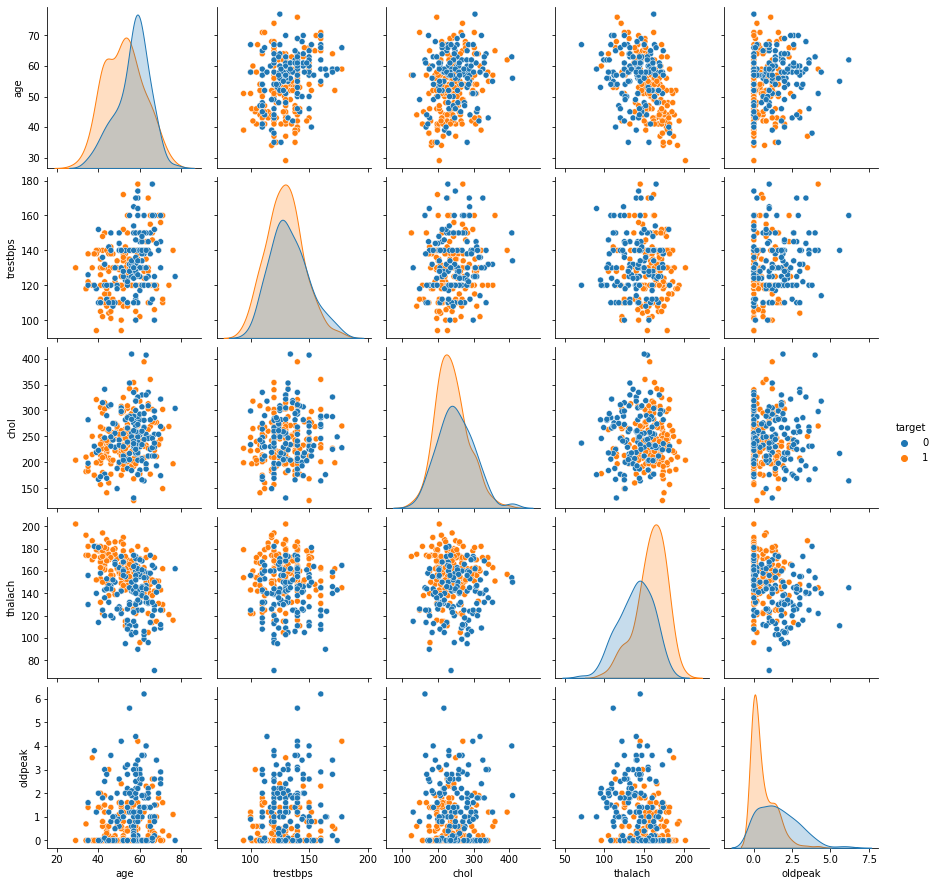

In [13]:
# Checking the overall data Shape
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "target", diag_kind = "kde")

In [14]:
dfDummy = df.copy()

In [15]:
dfDummy = pd.get_dummies(dfDummy, columns = categorical_list[:-1], drop_first = True)
dfDummy.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 

### Task 4: creat a model that fits the data


In [16]:
X = dfDummy.drop(["target"], axis = 1)
y = dfDummy[["target"]]

In [17]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\shoum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

### 

### Task 5: creating an accurecy table

In [20]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  7],
       [ 4, 31]], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        38
           1       0.82      0.89      0.85        35

    accuracy                           0.85        73
   macro avg       0.85      0.85      0.85        73
weighted avg       0.85      0.85      0.85        73



In [22]:
acc=accuracy_score(y_test, y_pred)
acc

0.8493150684931506